# Prueba Objetiva 2
Stephanie Gonzalez López

## Armas de Valorant - Riot Games

Para este codigo haremos un analisis de las armas del videojuego Valorant, armas cuyo daño varia dependiendo del tipo de arma y a que parte del cuerpo se dispara. Tambien compararemos el precio entre cada arma. Este juego cuenta con 17 armas que permiten al jugador una jugabilidad mas variada, de los cuales puede acceder a cada una de ellas dependiendo su precio. 

Aqui tenemos la interfaz (o como los jugadores lo conocen, la tienda de armas) donde se adquieren dichas armas con precios variados:

<img src=https://www.esportmaniacos.com/wp-content/uploads/2021/01/portada-informacion-armas-valorant-1024x576.jpg>


Empezamos por importar el archivo csv "valorant-weapons.csv" donde tenemos informacion como: 
- Nombre del arma
- Tipo de arma
- Precio
- Daño (Segun el punto donde llegue la bala)

Ademas, importamos las demas librerias que necesitaremos para este codigo.

In [44]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

In [7]:
df = pd.read_csv('valorant-weapons.csv') #Leemos el archivo
df 

,name,type,price,fire-rate,wall-pen,magazine,head-dmg-close,body-dmg-close,leg-dmg-close,head-dmg-medium,body-dmg-medium,leg-dmg-medium,head-dmg-long,body-dmg-long,leg-dmg-long
0,classic,sidearm,0,6.75,low,12,78,26,22,78,26,22,66,22,18
1,shorty,sidearm,200,3.30,low,2,36,12,10,24,8,6,9,3,2
2,frenzy,sidearm,400,10.00,low,13,78,26,22,63,21,17,63,21,17
3,ghost,sidearm,500,6.75,medium,15,105,33,26,88,25,21,88,25,21
4,sheriff,sidearm,800,4.00,high,6,160,55,47,160,55,47,145,50,43
5,bulldog,rifle,2100,9.15,medium,24,116,35,30,116,35,30,116,35,30
6,guardian,rifle,2700,6.50,medium,12,195,65,49,195,65,49,195,65,49
7,phantom,rifle,2900,11.00,medium,30,156,39,33,140,35,30,124,31,26
8,vandal,rifle,2900,9.25,medium,25,156,39,33,156,39,33,156,39,33
9,stinger,smg,1000,20.00,low,20,67,27,23,62,25,21,62,25,21


In [6]:
df.info() #Informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             17 non-null     object 
 1   type             17 non-null     object 
 2   price            17 non-null     int64  
 3   fire-rate        17 non-null     float64
 4   wall-pen         17 non-null     object 
 5   magazine         17 non-null     int64  
 6   head-dmg-close   17 non-null     int64  
 7   body-dmg-close   17 non-null     int64  
 8   leg-dmg-close    17 non-null     int64  
 9   head-dmg-medium  17 non-null     int64  
 10  body-dmg-medium  17 non-null     int64  
 11  leg-dmg-medium   17 non-null     int64  
 12  head-dmg-long    17 non-null     int64  
 13  body-dmg-long    17 non-null     int64  
 14  leg-dmg-long     17 non-null     int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 2.1+ KB


## 1) Los tipos de armas disponibles en el videojuego:

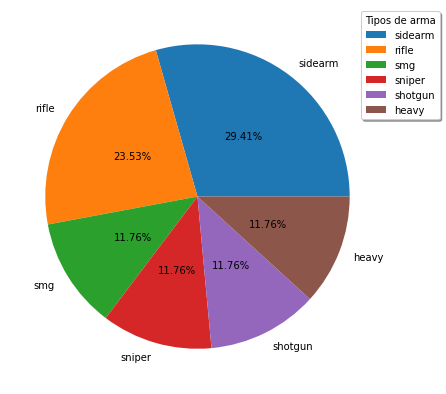

In [121]:
df_wt = df['type'].value_counts() #conteo de la cantidad de armas segun el tipo.
fig, ax = plt.subplots(figsize=(15,7))
plt.pie(df_wt, labels=df_wt.index,pctdistance=0.5, autopct='%1.2f%%')
plt.legend(loc='upper right', title='Tipos de arma', shadow=True, bbox_to_anchor=(1.15, 1))
plt.savefig('Tiposdearma.png')

Como podemos ver, la mayor cantidad de armas que exiten en este videojuego son del tipo "sidearm", armas que por lo general son usadas en las primeras dos o tres rondas de la partida por tener un precio accesible.

## 2) Precios de las armas:

In [53]:
w_price = df[['name', 'price']].sort_values(by='price') #Precio de cada arma, del menos al mas costoso, con su nombre correspondiente
w_price

,name,price
0,classic,0
1,shorty,200
2,frenzy,400
3,ghost,500
4,sheriff,800
13,bucky,900
9,stinger,1000
11,marshall,1100
14,judge,1500
10,spectre,1600


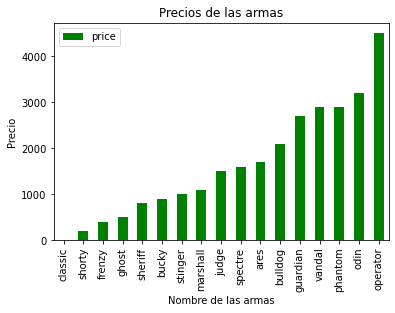

In [122]:
w_price.plot( kind = 'bar', x='name', y='price', color= 'g'); #plot para una grafica de barras
plt.title('Precios de las armas');
plt.xlabel('Nombre de las armas');
plt.ylabel('Precio');
plt.savefig('Price.png')

#Con esto, podemos comparar los precios de cada arma, de la menos a la mas costosa.

## 4) Armas con la mayor cadencia de tiro (fire rate):
Antes de seguir con este punto, dejaremos en claro que es "fire rate". 

Cadencia de tiro (fire rate en ingles) es el volumen de fuego o la cantidad de proyectiles disparados por un arma por unidad de tiempo. La cadencia de tiro en un arma depende del mecanismo de retroceso, su sistema de alimentación de proyectiles en la recámara y del sistema de enfriamiento.

Se dice que un arma tiene mayor cadencia de tiro cuando es capaz de disparar un mayor número de proyectiles por minuto.
Se especifica usualmente en “disparos por minuto” (DPM).

Fuente: https://es.wikipedia.org/wiki/Cadencia_de_tiro

In [81]:
fr = df[['name', 'fire-rate']].sort_values(by='fire-rate', ascending= False) #ascending= False es para colocar la lista de mayor a menor valor.
fr
#Nos arroja armas desde la que mayor cadencia de tiro tiene, hasta la que tiene menos.

,name,fire-rate
9,stinger,20.00
10,spectre,13.33
16,odin,12.00
7,phantom,11.00
2,frenzy,10.00
15,ares,10.00
8,vandal,9.25
5,bulldog,9.15
3,ghost,6.75
0,classic,6.75


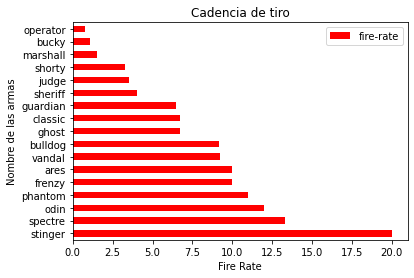

In [123]:
fr.plot(kind = 'barh', x= 'name', y= 'fire-rate', color= 'r');
plt.title('Cadencia de tiro');
plt.xlabel('Fire Rate');
plt.ylabel('Nombre de las armas');
plt.savefig('firerate.png')

Como podemos observar en las lineas de codigo y en la grafica se puede comparar la cadencia de tiro de cada arma, por ende los jugadores deben adaptarse dependiendo del tipo de arma que usan.

Ahora compararemos la cadencia de tiro dependiendo del tipo de arma:

In [92]:
fr_type = df.groupby('type')[['type', 'fire-rate']].agg('mean').sort_values(by='fire-rate', ascending=False).reset_index()
fr_type
#Nos arroja los tipos de arma y una media de la cadencia de tiro

,type,fire-rate
0,smg,16.665
1,heavy,11.000
2,rifle,8.975
3,sidearm,6.160
4,shotgun,2.300
5,sniper,1.125


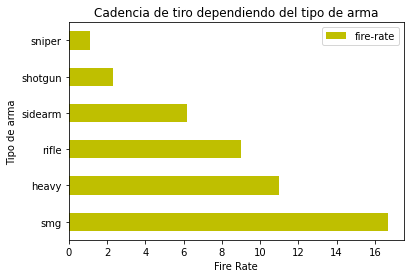

In [124]:
fr_type.plot(kind = 'barh', x= 'type', y= 'fire-rate', color= 'y');
plt.title('Cadencia de tiro dependiendo del tipo de arma');
plt.xlabel('Fire Rate');
plt.ylabel('Tipo de arma');
plt.savefig('firerate_type.png')

Claramente el tipo de arma "SMG" al tener tanta cadencia de disparo sirve mas como arma cuerpo a cuerpo, a diferencia del tipo de arma "Heavy" esta tiene mas probabilidad de dar al blanco en situaciones desfavorables. 

## 5) Daño de las armas:

In [100]:
damage = df[['name', 'type', 'head-dmg-close','body-dmg-close','leg-dmg-close','head-dmg-medium','body-dmg-medium','leg-dmg-medium','head-dmg-long','body-dmg-long','leg-dmg-long']]
damage

,name,type,head-dmg-close,body-dmg-close,leg-dmg-close,head-dmg-medium,body-dmg-medium,leg-dmg-medium,head-dmg-long,body-dmg-long,leg-dmg-long
0,classic,sidearm,78,26,22,78,26,22,66,22,18
1,shorty,sidearm,36,12,10,24,8,6,9,3,2
2,frenzy,sidearm,78,26,22,63,21,17,63,21,17
3,ghost,sidearm,105,33,26,88,25,21,88,25,21
4,sheriff,sidearm,160,55,47,160,55,47,145,50,43
5,bulldog,rifle,116,35,30,116,35,30,116,35,30
6,guardian,rifle,195,65,49,195,65,49,195,65,49
7,phantom,rifle,156,39,33,140,35,30,124,31,26
8,vandal,rifle,156,39,33,156,39,33,156,39,33
9,stinger,smg,67,27,23,62,25,21,62,25,21


 - Daño a corta distancia:

In [101]:
cd = damage[['name','type','head-dmg-close','body-dmg-close','leg-dmg-close']]
cd

,name,type,head-dmg-close,body-dmg-close,leg-dmg-close
0,classic,sidearm,78,26,22
1,shorty,sidearm,36,12,10
2,frenzy,sidearm,78,26,22
3,ghost,sidearm,105,33,26
4,sheriff,sidearm,160,55,47
5,bulldog,rifle,116,35,30
6,guardian,rifle,195,65,49
7,phantom,rifle,156,39,33
8,vandal,rifle,156,39,33
9,stinger,smg,67,27,23


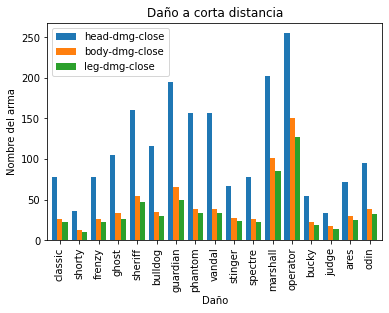

In [125]:
cd.plot(kind = 'bar', x= 'name', width= 0.8);
plt.title('Daño a corta distancia');
plt.xlabel('Daño');
plt.ylabel('Nombre del arma');
plt.savefig('dmgc.png')
#Comparacion del daño de las armas a corta distancia, dependiendo de la zona donde se dipare.

- Daño a media distancia:

In [113]:
md = damage[['name','type','head-dmg-medium','body-dmg-medium','leg-dmg-medium']]
md

,name,type,head-dmg-medium,body-dmg-medium,leg-dmg-medium
0,classic,sidearm,78,26,22
1,shorty,sidearm,24,8,6
2,frenzy,sidearm,63,21,17
3,ghost,sidearm,88,25,21
4,sheriff,sidearm,160,55,47
5,bulldog,rifle,116,35,30
6,guardian,rifle,195,65,49
7,phantom,rifle,140,35,30
8,vandal,rifle,156,39,33
9,stinger,smg,62,25,21


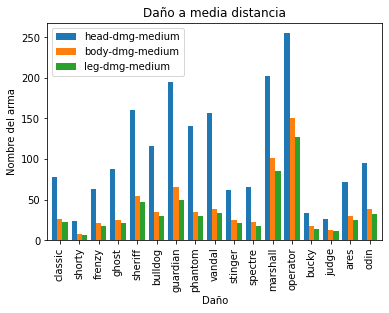

In [126]:
md.plot(kind = 'bar', x= 'name', width= 0.8);
plt.title('Daño a media distancia');
plt.xlabel('Daño');
plt.ylabel('Nombre del arma');
plt.savefig('dmgm.png')
#Comparacion del daño de las armas a media distancia, dependiendo de la zona donde se dipare.

- Daño a larga distancia:

In [116]:
ld = damage[['name','type','head-dmg-long','body-dmg-long','leg-dmg-long']]
ld

,name,type,head-dmg-long,body-dmg-long,leg-dmg-long
0,classic,sidearm,66,22,18
1,shorty,sidearm,9,3,2
2,frenzy,sidearm,63,21,17
3,ghost,sidearm,88,25,21
4,sheriff,sidearm,145,50,43
5,bulldog,rifle,116,35,30
6,guardian,rifle,195,65,49
7,phantom,rifle,124,31,26
8,vandal,rifle,156,39,33
9,stinger,smg,62,25,21


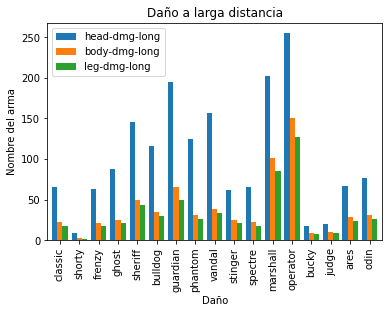

In [127]:
ld.plot(kind = 'bar', x= 'name', width= 0.8);
plt.title('Daño a larga distancia');
plt.xlabel('Daño');
plt.ylabel('Nombre del arma');
plt.savefig('dmgl.png')
#Comparacion del daño de las armas a larga distancia, dependiendo de la zona donde se dipare.

## Generamos el archivo .txt con los datos obtenidos y el analisis:

In [178]:
time = datetime.now()
time = time.strftime('%d/%m/%Y - %H:%M:%S')

file = open('Analisis.txt','w')
file.write("\n")
file.write(f"\n\n\n\n Stephanie Gonzalez Lopez  - {time}\n\n\n")

file.write("Datos obtenidos:\n\n\n")
file.write("-El tipo de armas con mayor cantidad de estas es SMG, cuenta con un total de 5 armas\n\n")
file.write("-El arma mas costosa del juego es Operator (4500 credits) y el arma menos costosa es la Classic (0 credits)\n\n")
file.write("-El arma con mayor cadencia de tiro en el juego es Stinger (20,00) y el arma con menos cadencia es Operator (0,75)\n\n")
file.write("-El tipo de arma con mayor cadencia de tiro son las SMG, con una cadencia de 16,665 \n\n")

file.write("Analisis final:\n\n\n")
file.write("En conclusion al analisis armamentistico del videojuego Valorant (Riot Games) es recomendable que los jugadores nuevos se acostumbren a entrar a una herramienta de practica") 
file.write("con el arma tipo SMG Spectre, dado a que es economica, precisa y con excelente cadencia letal. Asi pues, no todo es color de rosa ya que pierde presicion al disparar a distancias lejanas,")
file.write(" por consiguiente su damage es menor.\n")
file.write("En vista de lo mencionado, para solventar estas falencias lo recomendable seria practicar con todas las armas para adaptarse a cualquier situacion de combate en diversas distancias,")
file.write(" manejando correctamente la economia para hacer un mejor uso de ellas.\n\n")





file.close()